The following cells are for: 
- Creating visualisations to understand and investigate the data

In [1]:
# Importing Relevant Packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import calendar
import ast

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Importing Datasets
yt_df = pd.read_csv("/home/chigoz/Downloads/Disso/00. Inputs/yt_data.csv", delimiter = ",")
ga_df = pd.read_csv("/home/chigoz/Downloads/Disso/00. Inputs/ga_data.csv", delimiter = ",")
num_df = pd.read_csv("/home/chigoz/Downloads/Disso/00. Inputs/num_data.csv", delimiter = ",")
text_df = pd.read_csv("/home/chigoz/Downloads/Disso/00. Inputs/text_data.csv", delimiter = ",")

# Numeric-Specific Data

In [58]:
## Summary Statistics of numeric variables
summary_stats = num_df.describe()
summary_stats.reset_index(inplace = True)

# Saving Dataframe to CSV File
summary_stats.to_csv("summary_stats.csv", index=False, sep = ',')
summary_stats

index        users         year        month          day   video_views  \
0  count  1334.000000  1334.000000  1334.000000  1334.000000  1.334000e+03   
1   mean   291.211394  2019.187406     6.322339    15.764618  3.845299e+04   
2    std   176.283859     1.106873     3.528407     8.771933  1.137701e+05   
3    min     2.000000  2017.000000     1.000000     1.000000  2.221000e+03   
4    25%   174.000000  2018.000000     3.000000     8.000000  1.048600e+04   
5    50%   270.000000  2019.000000     6.000000    16.000000  1.894900e+04   
6    75%   366.750000  2020.000000     9.000000    23.000000  3.810900e+04   
7    max  1557.000000  2021.000000    12.000000    31.000000  2.184516e+06   

    video_likes  video_dislikes  comments_count  total_comment_likes_count  
0   1334.000000     1334.000000     1334.000000                1334.000000  
1    694.230135       24.213643       96.276612                 200.287106  
2    917.305540       62.159682       67.780696                 521.011706  
3     69.000000        1.000000       14.000000                   3.000000  
4    309.250000        7.000000       52.000000                  52.000000  
5    488.000000       13.000000       83.000000                 116.000000  
6    796.000000       22.000000      120.000000                 220.000000  
7  15475.000000     1185.000000      896.000000               10140.000000

In [4]:
# Viewing variables correlation to the label (dependent variable)
corr_matrix = num_df.corr()
corr_matrix["users"].sort_values(ascending=False)

users                        1.000000
month                        0.288612
year                         0.243365
comments_count               0.087886
day                          0.070708
video_likes                  0.052399
video_dislikes              -0.004350
video_views                 -0.031817
total_comment_likes_count   -0.043589
Name: users, dtype: float64

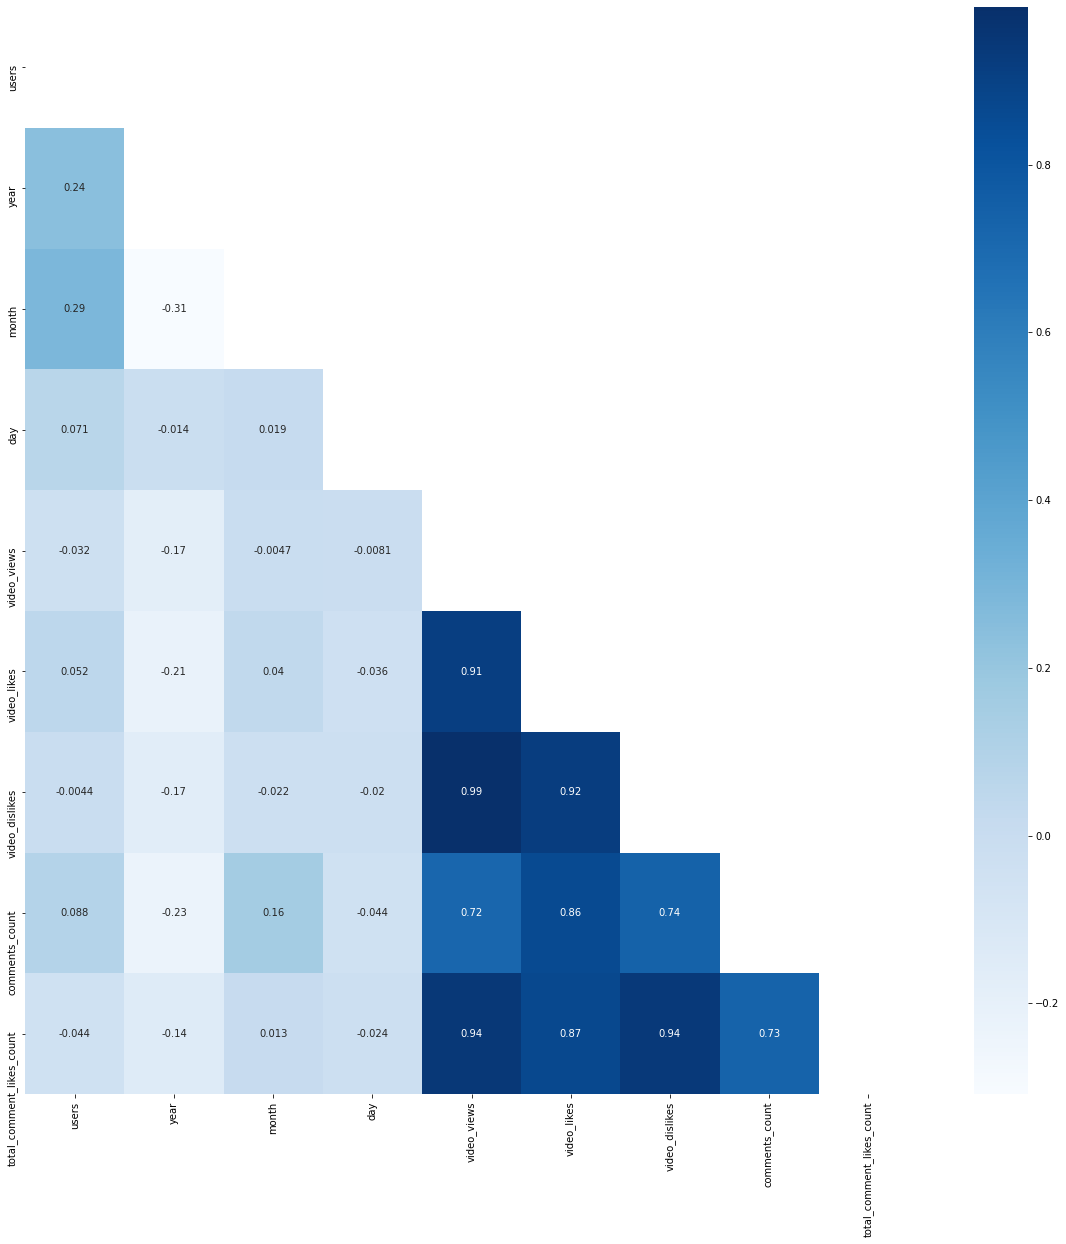

In [5]:
# Setting size of Correlation Matrix
plt.figure(figsize=(20,20))

# Mask to conceal upper half of correlation matrix
mask = np.triu(corr_matrix)

# Generating correlation matrix (heatmap)
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap="Blues")

# Setting Scale for the fonts
sns.set(font_scale=1.8)

#Saving figure
plt.savefig('correlation_matrix' +'.png')

plt.show()

# Google Analytics Data

In [6]:
# Setting size and specifications of visualisations
sns.set(rc={'figure.figsize':(13, 7)})

## 1. Daily Website Users Counts

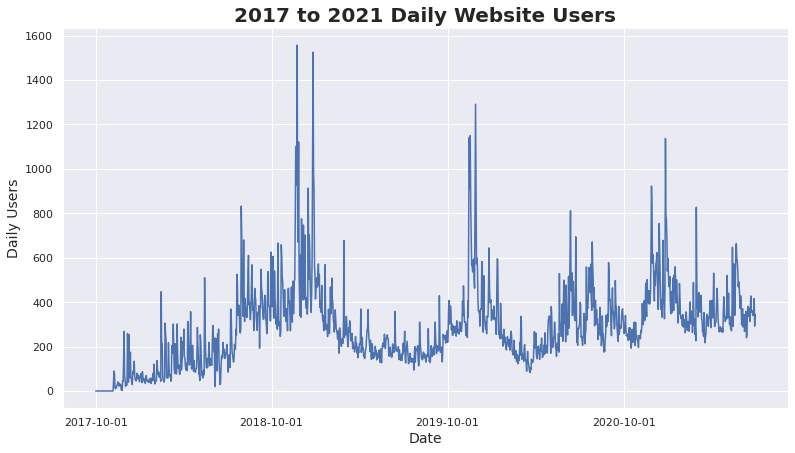

In [7]:
## Scaling font
sns.set(font_scale=1.0)

# Setting up line plot
ax = sns.lineplot(x='date',y='users',data = ga_df)

# Setting the title, x and y axis labels
ax.set_title('2017 to 2021 Daily Website Users', fontsize='20', weight='bold')
ax.set_xlabel('Date', fontsize='14')
ax.set_ylabel('Daily Users', fontsize='14')

# Setting x axis labels location yearly
ax.xaxis.set_major_locator(dates.YearLocator())

#Saving figure
plt.savefig('daily_website_users_'+ 'all_years' +'.png')

plt.show()

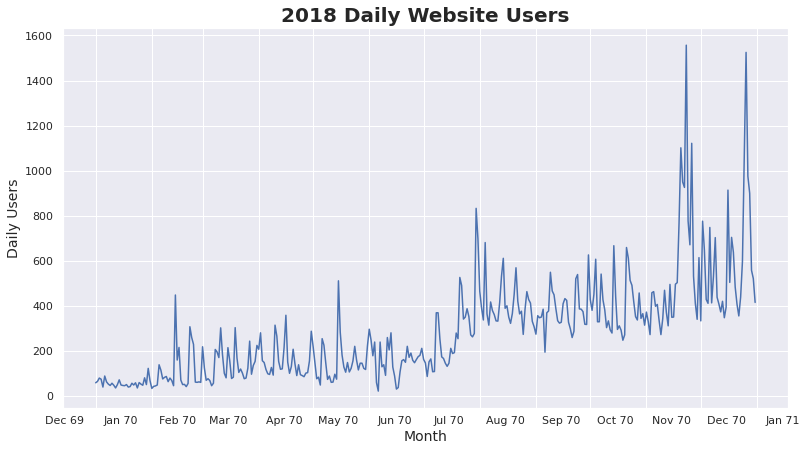

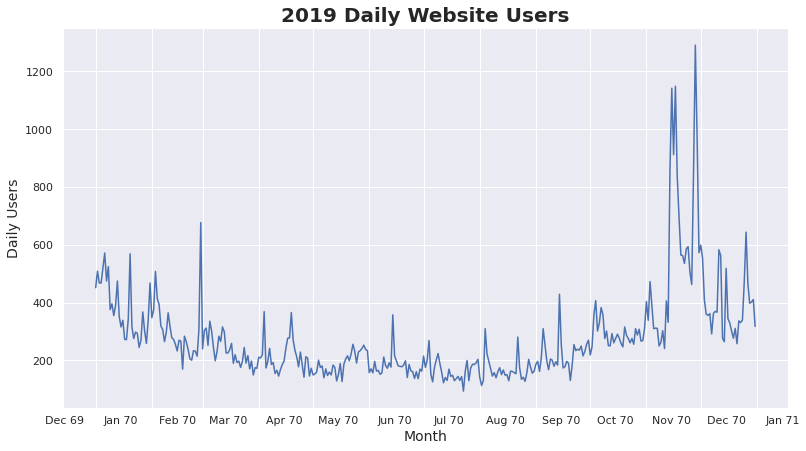

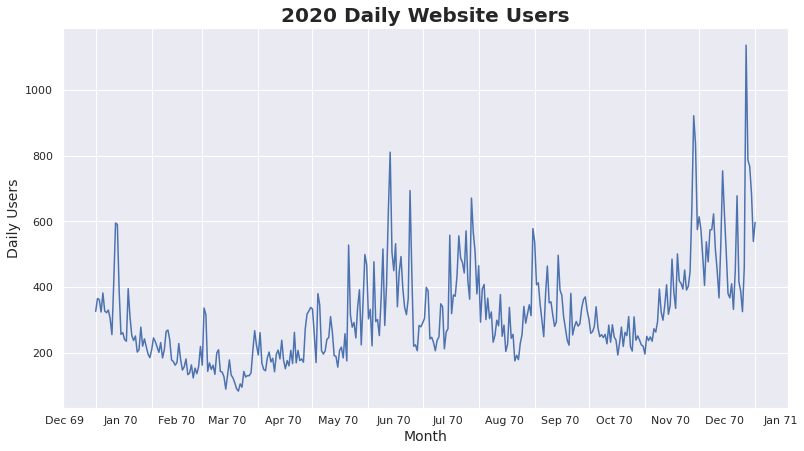

In [8]:
# Full Years in Data
years = [2018, 2019, 2020]

# Looping through each year
for x in years:

    # Setting up line plot
    ax = sns.lineplot(x='date',y='users',data = ga_df[ga_df['year']==x])
    
    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Daily Website Users', fontsize='20', weight='bold')
    ax.set_xlabel('Month', fontsize='14')
    ax.set_ylabel('Daily Users', fontsize='14')
    
    # Setting x axis labels location in the centre
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
    
    # Setting the format of x axis labels
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%b %y'))
    
    # Saving figure
    plt.savefig('daily_website_users_'+ str(x) +'.png')
    
    plt.show()

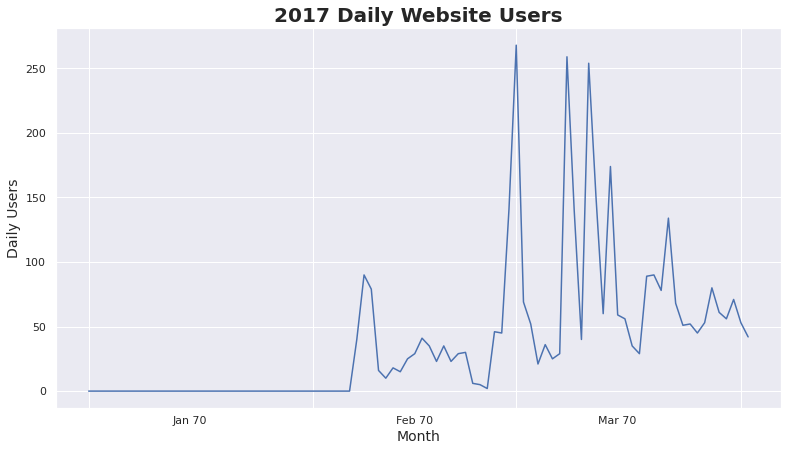

In [9]:
# Setting up line plot
ax = sns.lineplot(x='date',y='users',data = ga_df[ga_df['year']==2017])

# Setting the title, x and y axis labels
ax.set_title('2017 Daily Website Users', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Daily Users', fontsize='14')

# Setting x axis labels location in the centre
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

# Setting the format of x axis labels
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b %y'))

# Saving figure
plt.savefig('daily_website_users_'+ str(2017) +'.png')

plt.show()

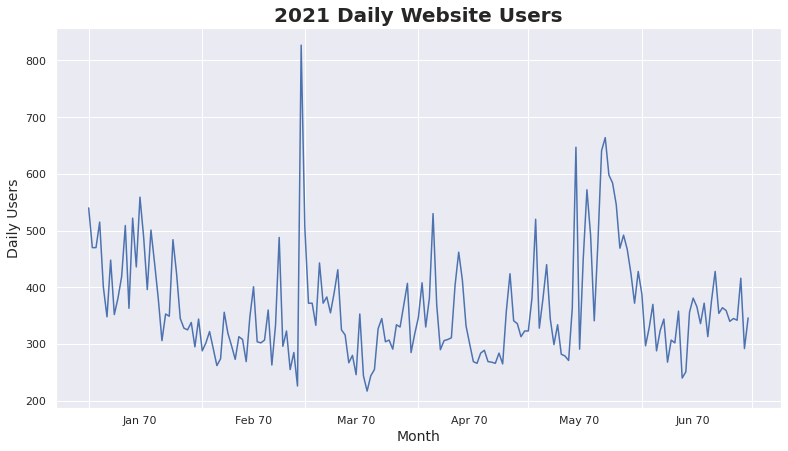

In [10]:
# Setting up line plot
ax = sns.lineplot(x='date',y='users',data = ga_df[ga_df['year']==2021])

# Setting the title, x and y axis labels
ax.set_title('2021 Daily Website Users', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Daily Users', fontsize='14')

# Setting x axis labels location in the centre
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

# Setting the format of x axis labels
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b %y'))

# Saving figure
plt.savefig('daily_website_users_'+ str(2021) +'.png')

plt.show()

# YouTube Analytics Data

## 2. Monthly Video Uploads Count

In [11]:
# Creating dataset with uploads count per month
uploads = yt_df.groupby(by = ['year', 'month']).count()
uploads.reset_index(inplace = True)

uploads.head()

year  month  date  video_id  video_title  video_description  video_tags  \
0  2017     11    12        12           12                 12          12   
1  2017     12     9         9            9                  9           9   
2  2018      1     4         4            4                  4           4   
3  2018      2     2         2            2                  2           2   
4  2018      3     7         7            7                  7           7   

   video_views  video_likes  video_dislikes  video_comments  comments_count  \
0           12           12              12              12              12   
1            9            9               9               9               9   
2            4            4               4               4               4   
3            2            2               2               2               2   
4            7            7               7               7               7   

   total_comment_likes_count  day  
0                         12   12  
1                          9    9  
2                          4    4  
3                          2    2  
4                          7    7

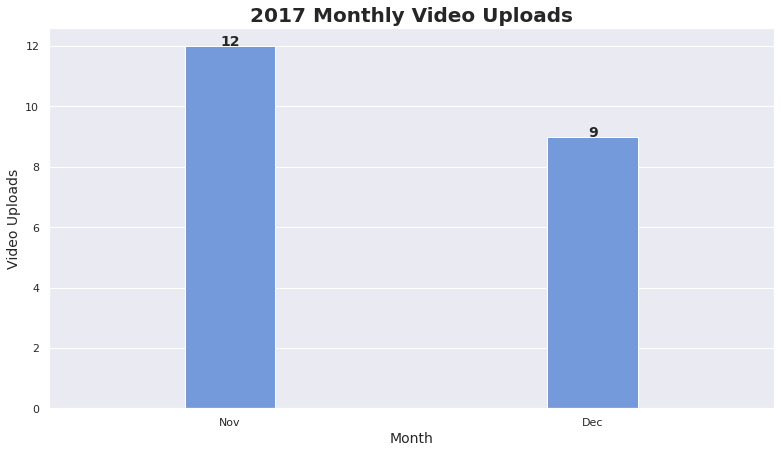

In [12]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_id',data = uploads[uploads['year']==2017], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2017 Monthly Video Uploads', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Uploads', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .25)

# Setting x axis tick labels
ax.set_xticklabels(['Nov', 'Dec'])

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_uploads_'+ str(2017) +'.png')

plt.show()

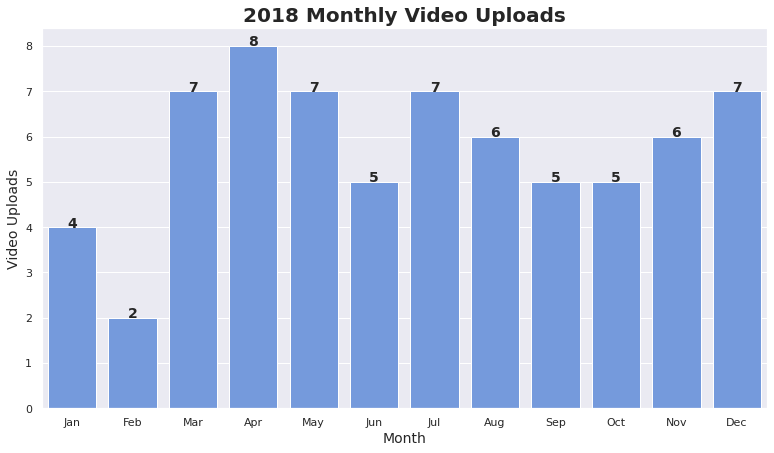

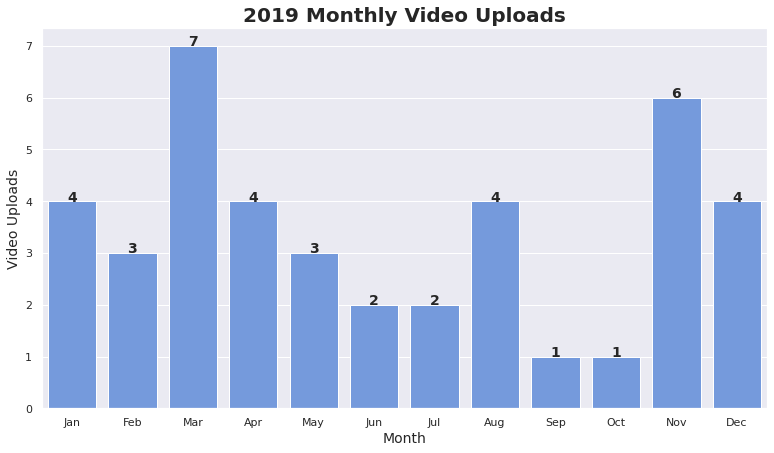

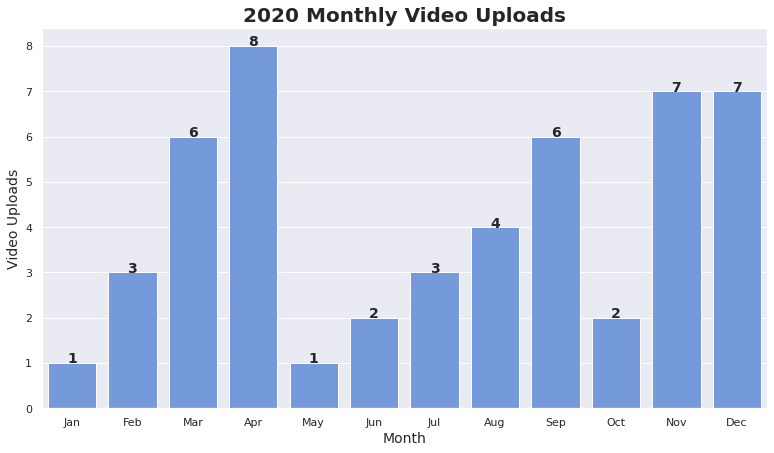

In [13]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Looping through each year
for x in years:

    # Creating dataset with uploads count per month
    uploads = yt_df.groupby(by = ['year', 'month']).count()
    uploads.reset_index(inplace = True)

    # Setting up bar chart
    ax = sns.barplot(x = 'month', y = 'video_id',data = uploads[uploads['year']==x], color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Monthly Video Uploads', fontsize='20', weight='bold')
    ax.set_xlabel('Month', fontsize='14')
    ax.set_ylabel('Video Uploads', fontsize='14')

    # Setting x axis tick labels
    ax.set_xticklabels(cal_months) 

    # Showing values at the top of the bar
    show_values_on_bars(ax)

    # Saving figure
    plt.savefig('monthly_video_uploads_'+ str(x) +'.png')
    
    plt.show()

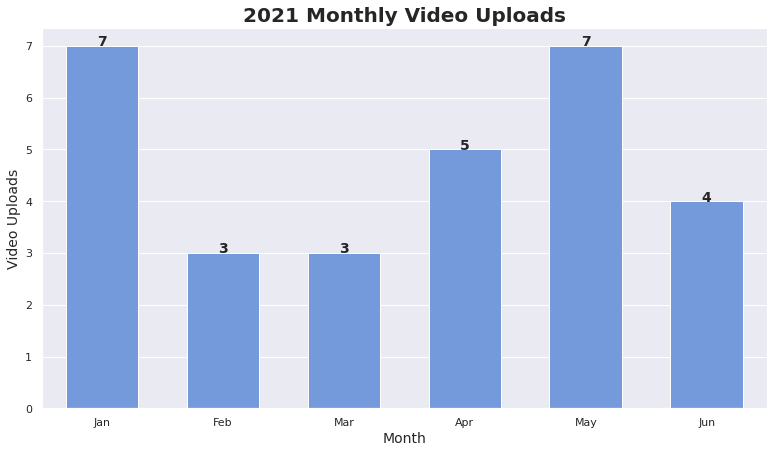

In [14]:
# Creating dataset with uploads count per month
uploads = yt_df.groupby(by = ['year', 'month']).count()
uploads.reset_index(inplace = True)

# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_id',data = uploads[uploads['year']==2021], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2021 Monthly Video Uploads', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Uploads', fontsize='14')

# Changing width of the width
change_width(ax, .6)

# Setting x axis tick labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_uploads_'+ str(2021) +'.png')

plt.show()

## 3. Monthly Video Views Count

In [15]:
# Creating dataset with views and likes/dislikes count per month
views_likes = yt_df.groupby(by = ['year', 'month']).sum()
views_likes.reset_index(inplace = True)

views_likes.head()

year  month  video_views  video_likes  video_dislikes  comments_count  \
0  2017     11       238464         4626              96             796   
1  2017     12       507772         6333             284             944   
2  2018      1        73902         1705              41             380   
3  2018      2        47085         1178              21             163   
4  2018      3      2299800        17966            1254            1290   

   total_comment_likes_count  day  
0                       1194  214  
1                       2942  121  
2                        643   44  
3                        190   13  
4                      10661  103

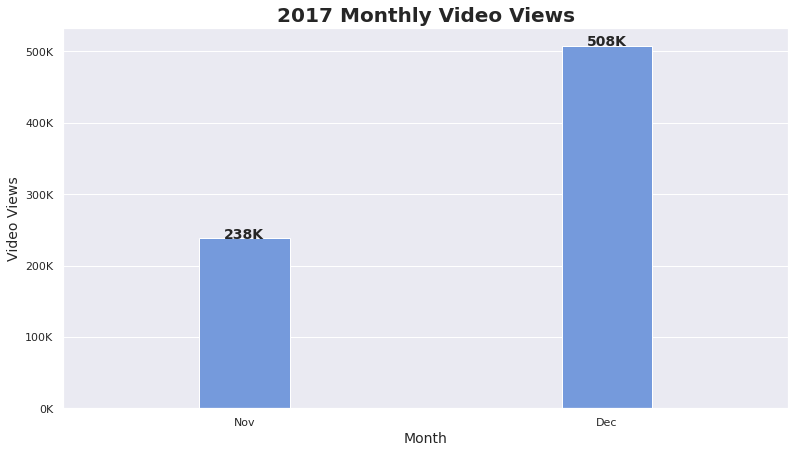

In [16]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_views',data = views_likes[views_likes['year']==2017], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2017 Monthly Video Views', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Views', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .25)

# Setting x axis tick labels
ax.set_xticklabels(['Nov', 'Dec'])

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: str(format(int(x/1000)) + 'K')))

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}K'.format((p.get_height())/1000)
            ax.text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_views_'+ str(2017) +'.png')

plt.show()

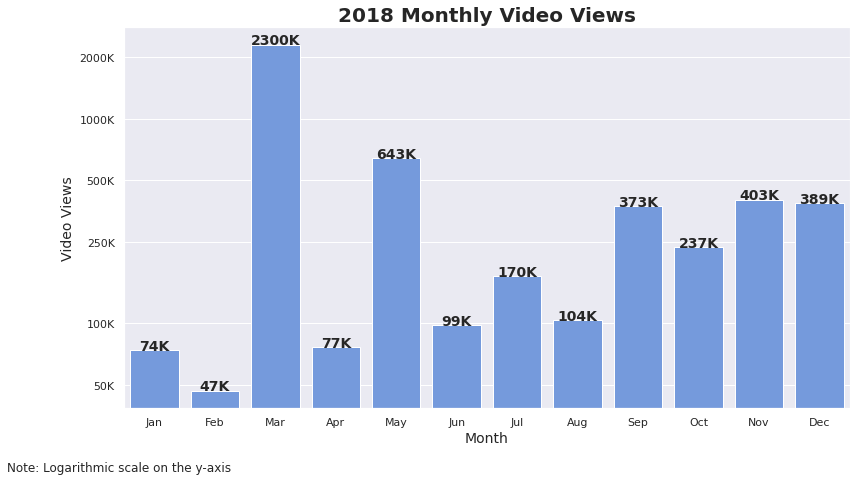

In [17]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Creating dataset with uploads count per month
uploads = yt_df.groupby(by = ['year', 'month']).count()
uploads.reset_index(inplace = True)

# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_views',data = views_likes[views_likes['year']==2018], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2018 Monthly Video Views', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Views', fontsize='14')

# Setting x axis tick labels
ax.set_xticklabels(cal_months) 

# Changing the y axis from a linear to a logarithmic scale
ax.set_yscale('log')
ax.set_yticks([50000, 100000, 250000, 500000, 1000000, 2000000])
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: str(format(int(x/1000)) + 'K')))

# Note calling out the Logarithmic Scale
plt.figtext(0, 0, "Note: Logarithmic scale on the y-axis")

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_views_'+ str(2018) +'.png')

plt.show()

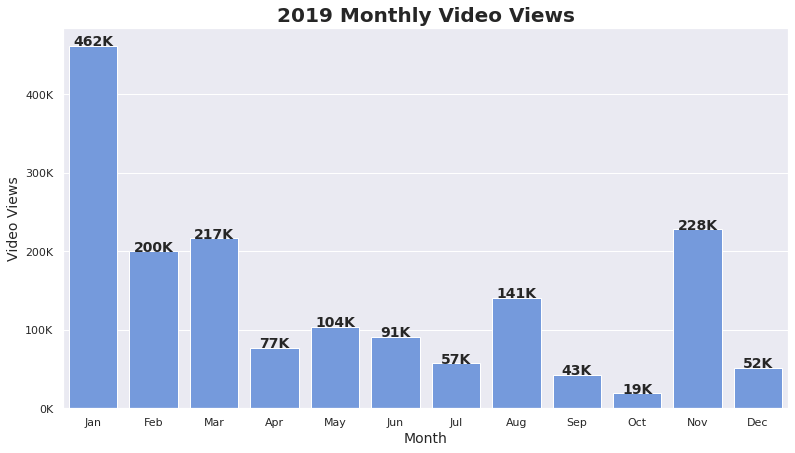

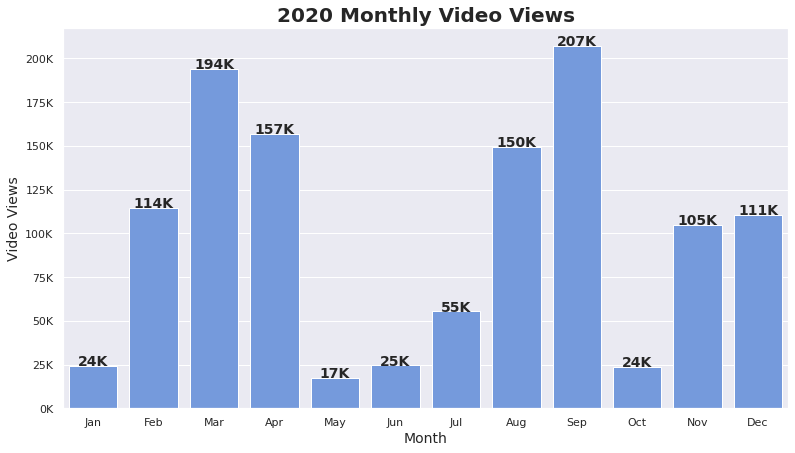

In [18]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2019, 2020]

# Looping through each year
for x in years:

    # Creating dataset with uploads count per month
    uploads = yt_df.groupby(by = ['year', 'month']).count()
    uploads.reset_index(inplace = True)

    # Setting up bar chart
    ax = sns.barplot(x = 'month', y = 'video_views',data = views_likes[views_likes['year']==x], color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Monthly Video Views', fontsize='20', weight='bold')
    ax.set_xlabel('Month', fontsize='14')
    ax.set_ylabel('Video Views', fontsize='14')

    # Setting x axis tick labels
    ax.set_xticklabels(cal_months) 
    
    # Changing the y axis labels to thousands
    ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: str(format(int(x/1000)) + 'K')))
    
    # Showing values at the top of the bar
    show_values_on_bars(ax)
    
    # Saving figure
    plt.savefig('monthly_video_views_'+ str(x) +'.png')
    
    plt.show()

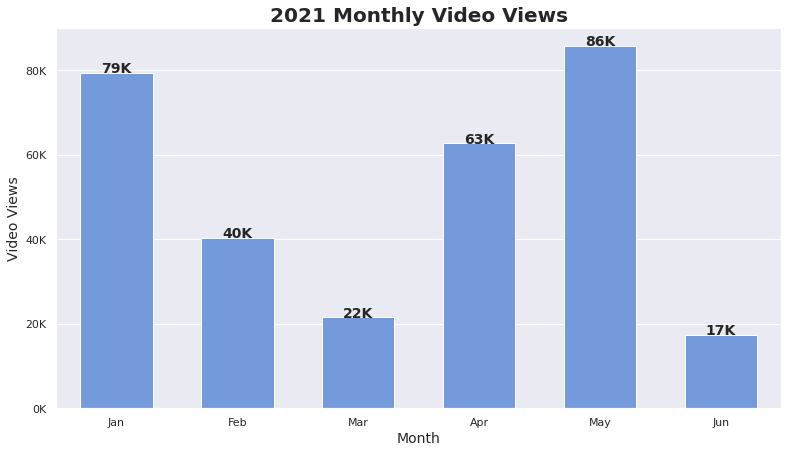

In [19]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_views',data = views_likes[views_likes['year']==2021], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2021 Monthly Video Views', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Views', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .6)

# Setting x axis tick labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: str(format(int(x/1000)) + 'K')))

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_views_'+ str(2021) +'.png')

plt.show()

## 4. Top 5 Viewed Videos

In [20]:
# Merging Video Title to Dataframe
top_5 = yt_df

# Creating Likes and Dislikes Ratio (adding a constant to avoid infinity)
top_5["likes_dislikes_ratio"] = top_5["video_likes"]/(top_5["video_dislikes"]+1)

# Removing irrelevant fields
top_5 = top_5[["video_id", "year", "video_title", "video_views", "comments_count", "likes_dislikes_ratio"]]

top_5.head()

video_id  year                                        video_title  \
0  3Cg8-eoNXdY  2021  SLIM FIT DENIM JEANS LATEST PICK UPS + COLLECT...   
1  zgXoCGUcR9w  2021  ‚òÄÔ∏è‚òÄÔ∏èSUMMER OUTFIT PICKUPS UNBOXING | TMONCLER,...   
2  AFpME2E2GAY  2021  MONTHLY DESIGNER SELECTIONS UNBOXING & TRY-ON ...   
3  4TJCzY3Ph88  2021  ULTIMATE BALENCIAGA TRIPLE S , TRACK & SPEED S...   
4  TX3TFXp2y2M  2021  üî•üî• 6 HOT MENSWEAR SUMMER SALES HAPPENING RIGHT...   

   video_views  comments_count  likes_dislikes_ratio  
0         3275              36             11.777778  
1         4295              39             21.625000  
2         5642              38             52.250000  
3         4134              38             19.428571  
4         7385              14             44.000000

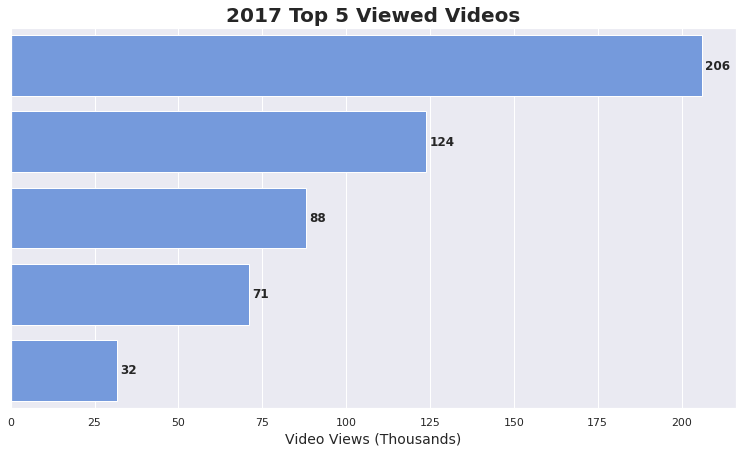

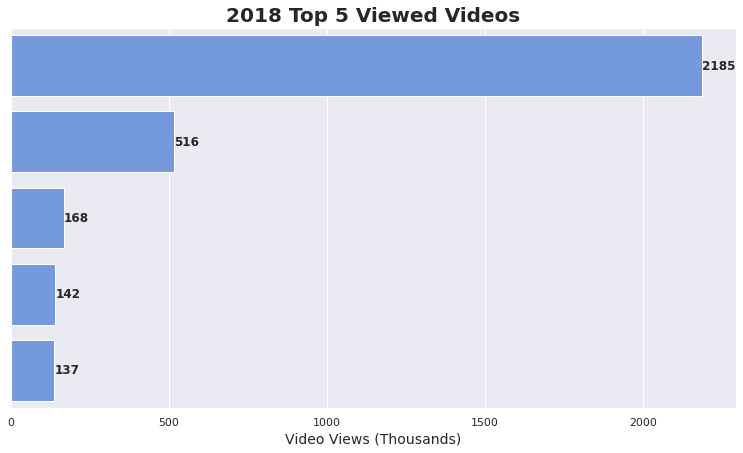

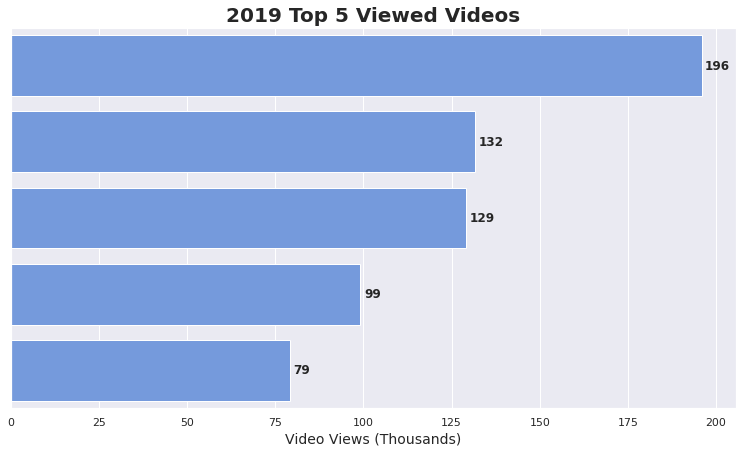

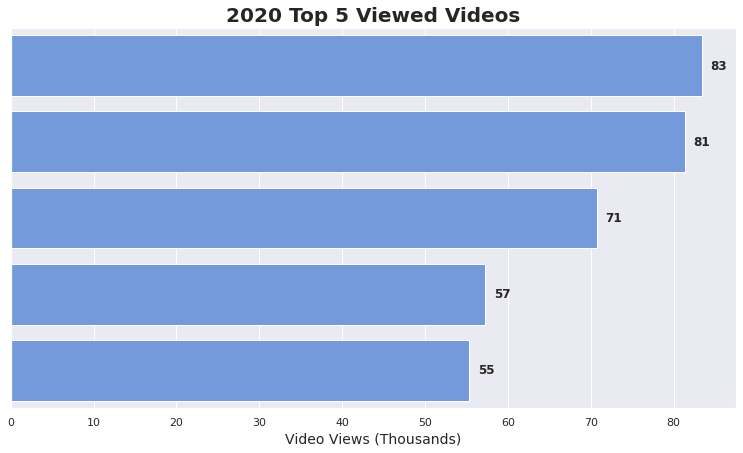

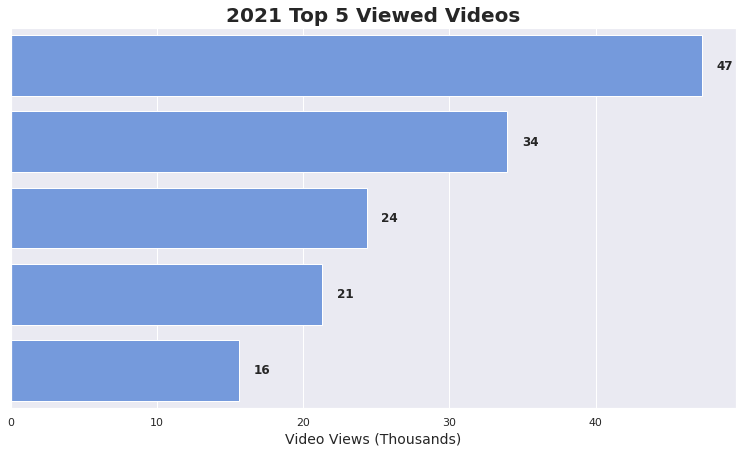

In [21]:
# Years for graphs
years = [2017, 2018, 2019, 2020, 2021]

for x in years:
    
    # Sorting and selcting top 5 values of dataframe
    top_5_views = top_5[top_5['year']==x].sort_values(by = 'video_views', ascending = False)[:5]
    top_5_views['video_views'] = top_5_views['video_views']/1000
    
    # Creating the bar chart
    ax = sns.barplot(x = 'video_views', y = 'video_title',data = top_5_views, color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Top 5 Viewed Videos', fontsize='20', weight='bold')
    ax.set_xlabel('Video Views (Thousands)', fontsize='14')
    ax.set_ylabel('', fontsize='14')

    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width + 1,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.0f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center',
               weight = 'bold')  # vertical alignment
    
    # Removing y axis tick lables
    ax.set(yticklabels=[])
    
    # Saving figure
    plt.savefig('top_5_viewed_videos_'+ str(x) +'.png')
    
    plt.show()

In [22]:
top_5_likes = top_5[top_5['year']==2021].sort_values(by = 'likes_dislikes_ratio', ascending = False)[:5]
list(top_5_likes["video_title"])

['SPRING/SUMMER 2021 MYSTERY UNBOXING  | MONCLER + CP COMPANY DESIGNER',
 '‚öΩ‚öΩ STONE ISLAND BUYS ITALIAN FOOTBALL CLUB ??',
 'THIS IS DESIGNER POP UP STORE&#39,S BIGGEST CP COMPANY CLEARANCE SALE YET !!!',
 'üò≤ üò≤ REVISTING STONE ISLAND OUTLET AFTER LOCKDOWN MAY 2021',
 'MONTHLY DESIGNER SELECTIONS UNBOXING & TRY-ON  | FT Stone Island, Palm Angels, Ksubi, Moncler, AMI']

## 5. Monthly Video Likes and Dislikes Count

In [23]:
# Creating dataframe for monthly video likes and dislikes
likes_dislikes = views_likes[['year', 'month', 'video_likes', 'video_dislikes']]
likes_dislikes = pd.melt(likes_dislikes, id_vars = ['year', 'month'], var_name=['type'])

# Sorting dataframe by year and month
likes_dislikes.sort_values(by = ['year', 'month'], inplace = True)

likes_dislikes.head()

year  month            type  value
0   2017     11     video_likes   4626
44  2017     11  video_dislikes     96
1   2017     12     video_likes   6333
45  2017     12  video_dislikes    284
2   2018      1     video_likes   1705

/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


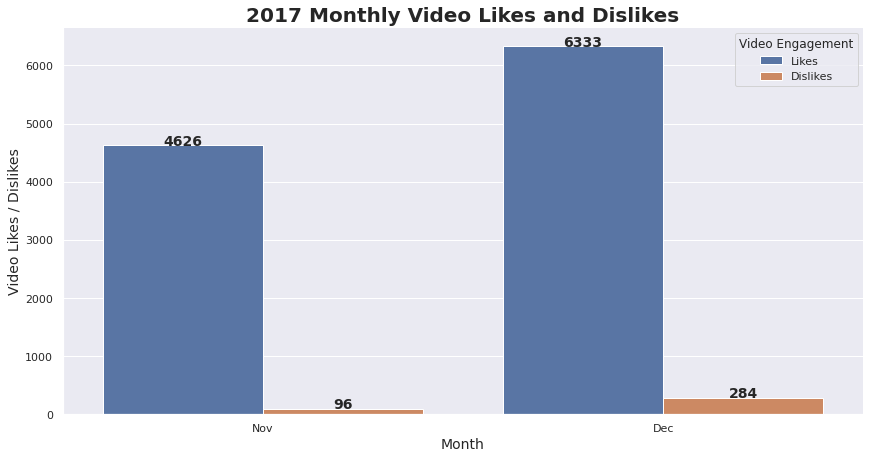

In [24]:
# Setting up bar chart
ax = sns.catplot(x = 'month', y = 'value', hue = 'type', kind='bar', size=6, aspect=2, data = likes_dislikes[likes_dislikes['year']==2017], legend = False)

# Setting the title, x and y axis labels
ax.axes[0,0].set_title('2017 Monthly Video Likes and Dislikes', fontsize='20', weight='bold')
ax.axes[0,0].set_xlabel('Month', fontsize='14')
ax.axes[0,0].set_ylabel('Video Likes / Dislikes', fontsize='14')

# Setting x axis tick labels
ax.axes[0,0].set_xticklabels(['Nov', 'Dec'])

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.axes[0,0].patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format((p.get_height()))
            ax.axes[0,0].text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

legend_labels, _= ax.axes[0,0].get_legend_handles_labels()
ax.axes[0,0].legend(legend_labels, ['Likes','Dislikes'], 
          bbox_to_anchor=(1,1), 
          title='Video Engagement')

# Saving figure
plt.savefig('monthly_video_likes_dislikes_'+ str(2017) +'.png')

plt.show()

/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


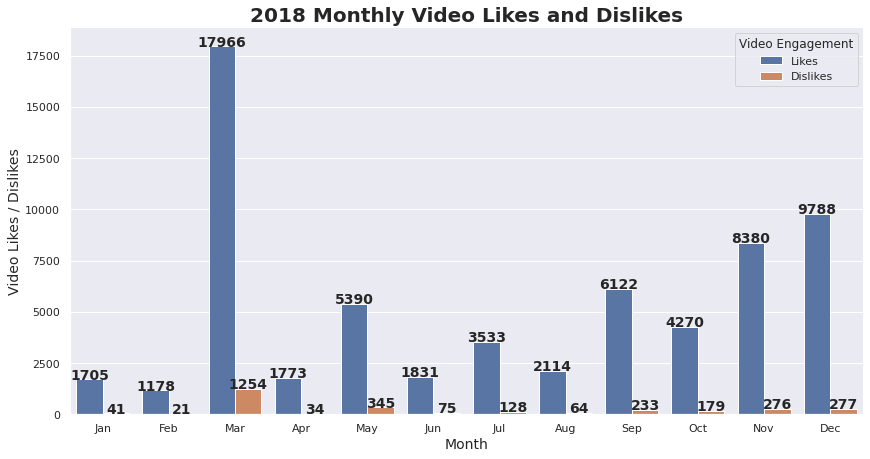

/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


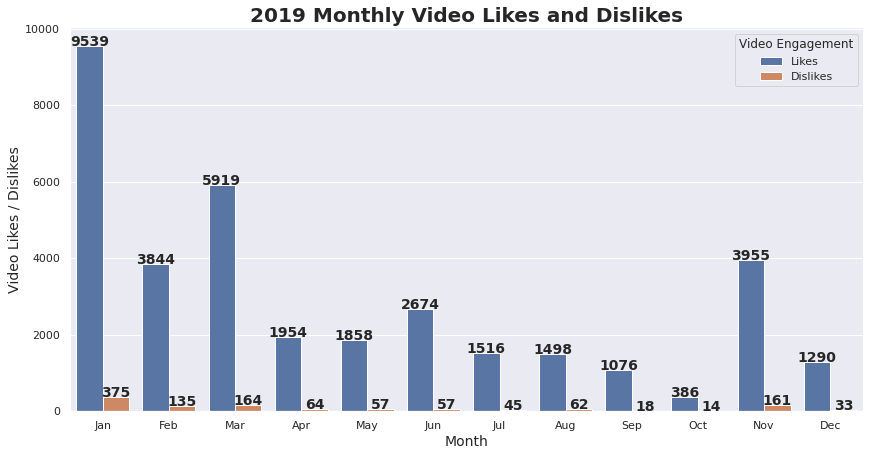

/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


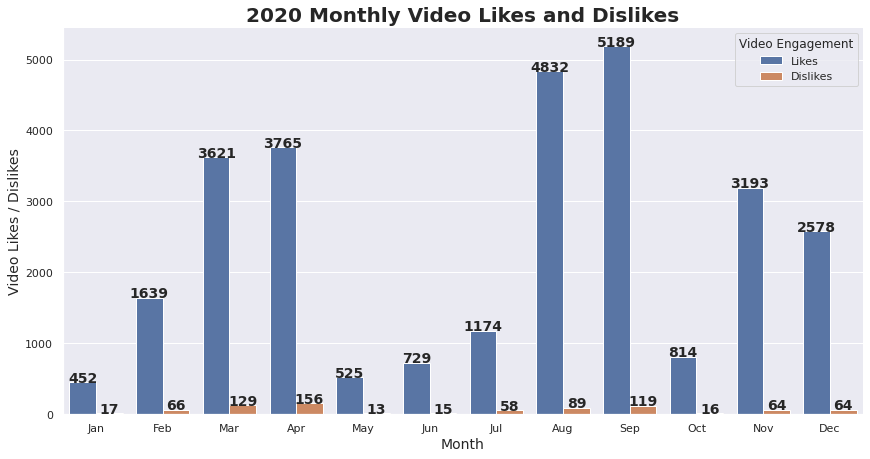

In [25]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2018, 2019, 2020]

# Looping through each year
for x in years:

    # Setting up bar chart
    ax = sns.catplot(x = 'month', y = 'value', hue = 'type', kind='bar', size=6, aspect=2, data = likes_dislikes[likes_dislikes['year']==x], legend = False)

    # Setting the title, x and y axis labels
    ax.axes[0,0].set_title(str(x) + ' Monthly Video Likes and Dislikes', fontsize='20', weight='bold')
    ax.axes[0,0].set_xlabel('Month', fontsize='14')
    ax.axes[0,0].set_ylabel('Video Likes / Dislikes', fontsize='14')

    # Setting x axis tick labels
    ax.axes[0,0].set_xticklabels(cal_months)

    # Function to show values at the top of the bar
    def show_values_on_bars(axs):
        def _show_on_single_plot(ax):        
            for p in ax.axes[0,0].patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = '{:.0f}'.format((p.get_height()))
                ax.axes[0,0].text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

        if isinstance(axs, np.ndarray):
            for idx, ax in np.ndenumerate(axs):
                _show_on_single_plot(ax)
        else:
            _show_on_single_plot(axs)

    # Showing values at the top of the bar
    show_values_on_bars(ax)

    legend_labels, _= ax.axes[0,0].get_legend_handles_labels()
    ax.axes[0,0].legend(legend_labels, ['Likes','Dislikes'], 
              bbox_to_anchor=(1,1), 
              title='Video Engagement')
    
    # Saving figure
    plt.savefig('monthly_video_likes_dislikes_'+ str(x) +'.png')
    
    plt.show()

/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


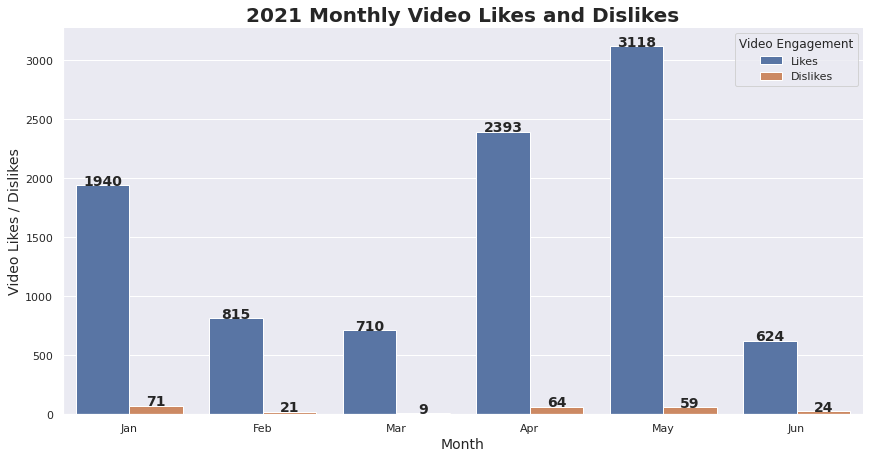

In [26]:
# Setting up bar chart
ax = sns.catplot(x = 'month', y = 'value', hue = 'type', kind='bar', size=6, aspect=2, data = likes_dislikes[likes_dislikes['year']==2021], legend = False)

# Setting the title, x and y axis labels
ax.axes[0,0].set_title('2021 Monthly Video Likes and Dislikes', fontsize='20', weight='bold')
ax.axes[0,0].set_xlabel('Month', fontsize='14')
ax.axes[0,0].set_ylabel('Video Likes / Dislikes', fontsize='14')

# Setting x axis tick labels
ax.axes[0,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.axes[0,0].patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format((p.get_height()))
            ax.axes[0,0].text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

legend_labels, _= ax.axes[0,0].get_legend_handles_labels()
ax.axes[0,0].legend(legend_labels, ['Likes','Dislikes'], 
          bbox_to_anchor=(1,1), 
          title='Video Engagement')

# Saving figure
plt.savefig('monthly_video_likes_dislikes_'+ str(2021) +'.png')

plt.show()

## 6. Monthly Comments Count

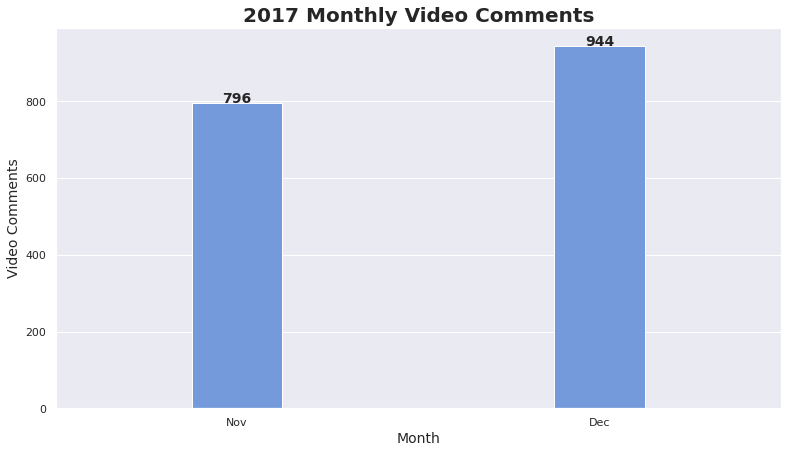

In [27]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'comments_count', data = views_likes[views_likes['year']==2017], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2017 Monthly Video Comments', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Comments', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .25)

# Setting x axis tick labels
ax.set_xticklabels(['Nov', 'Dec'])

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x))))

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format((p.get_height()))
            ax.text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_comments_'+ str(2017) +'.png')

plt.show()

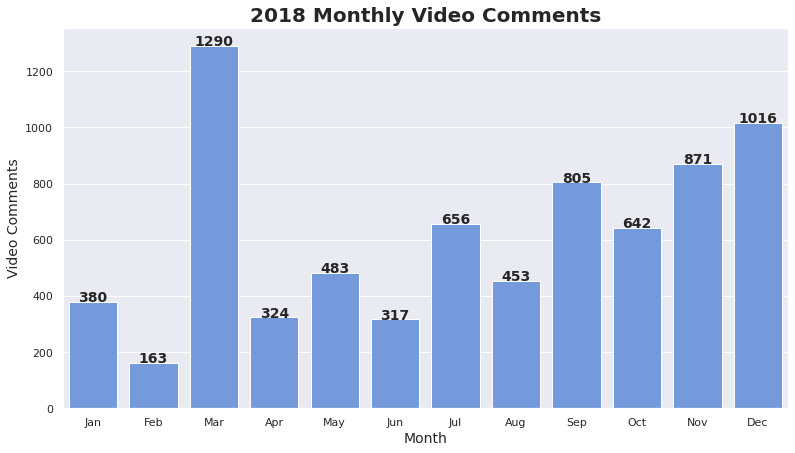

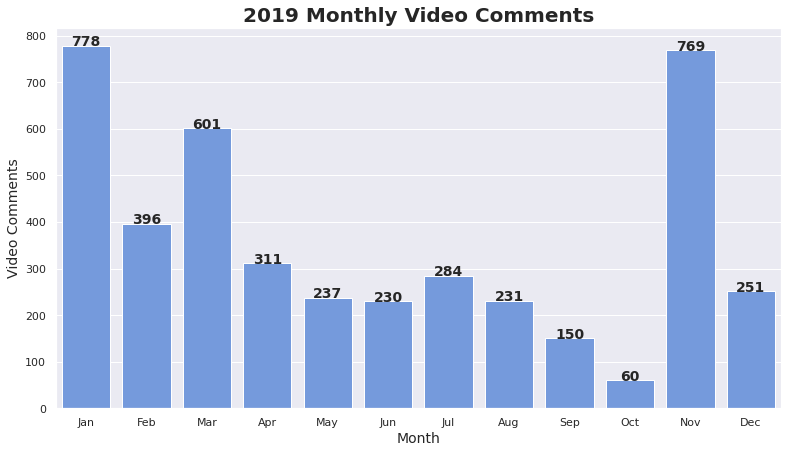

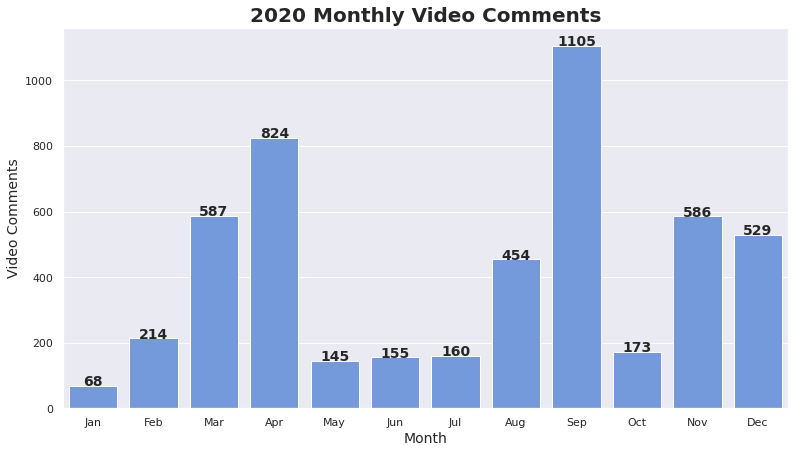

In [28]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2018, 2019, 2020]

# Looping through each year
for x in years:

    # Creating dataset with uploads count per month
    uploads = yt_df.groupby(by = ['year', 'month']).count()
    uploads.reset_index(inplace = True)

    # Setting up bar chart
    ax = sns.barplot(x = 'month', y = 'comments_count',data = views_likes[views_likes['year']==x], color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Monthly Video Comments', fontsize='20', weight='bold')
    ax.set_xlabel('Month', fontsize='14')
    ax.set_ylabel('Video Comments', fontsize='14')

    # Setting x axis tick labels
    ax.set_xticklabels(cal_months) 
    
    # Changing the y axis labels to thousands
    ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x))))
    
    # Showing values at the top of the bar
    show_values_on_bars(ax)
    
    # Saving figure
    plt.savefig('monthly_video_comments_'+ str(x) +'.png')
    
    plt.show()

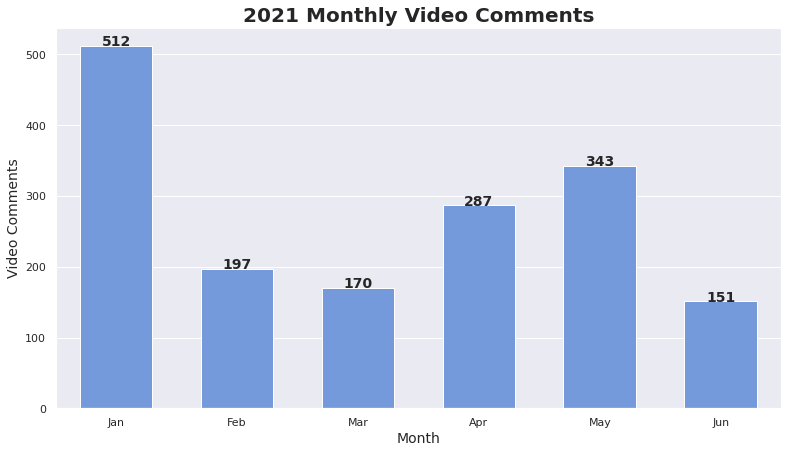

In [29]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'comments_count',data = views_likes[views_likes['year']==2021], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2021 Monthly Video Comments', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Comments', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .6)

# Setting x axis tick labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x))))

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_comments_'+ str(2021) +'.png')

plt.show()

## 7. Top 5  Commented Videos

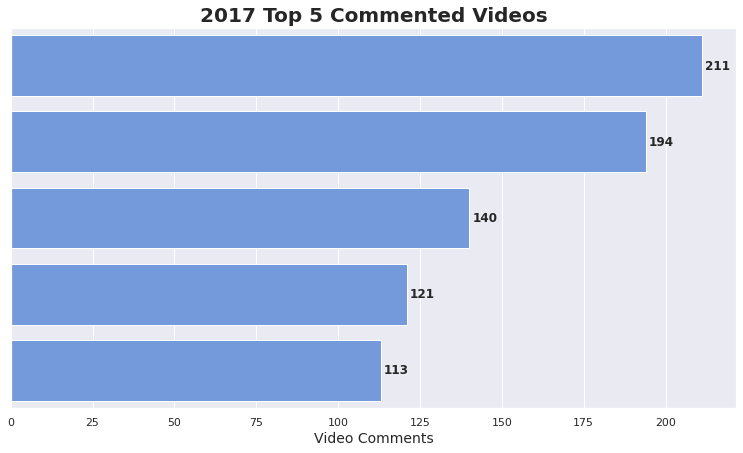

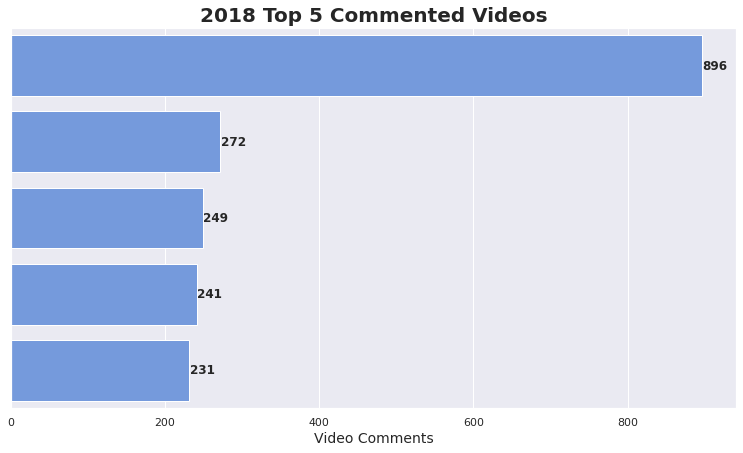

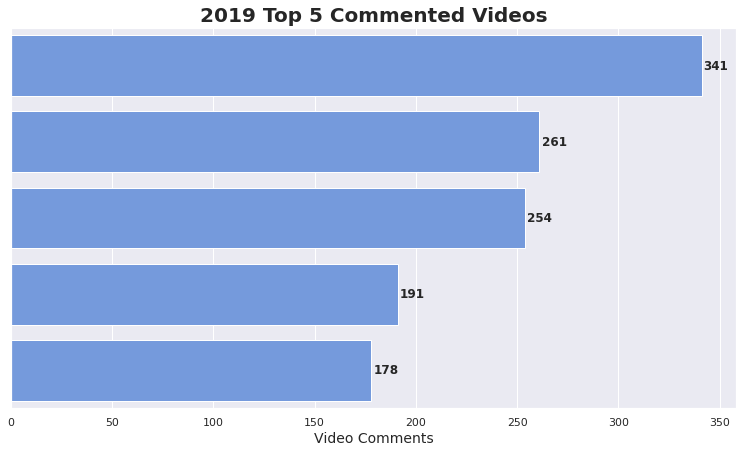

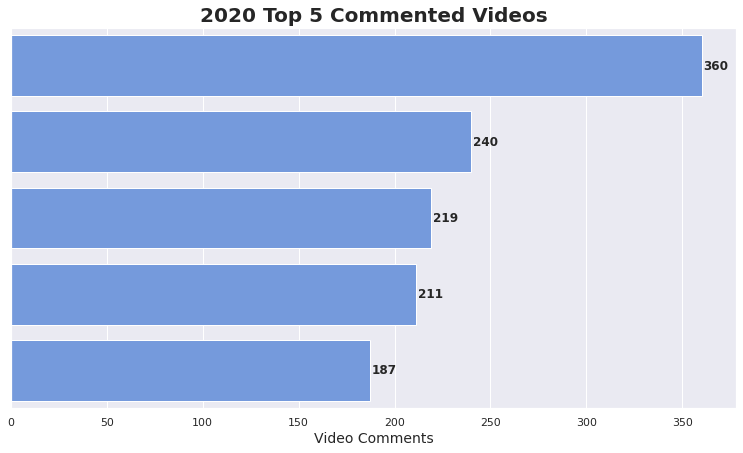

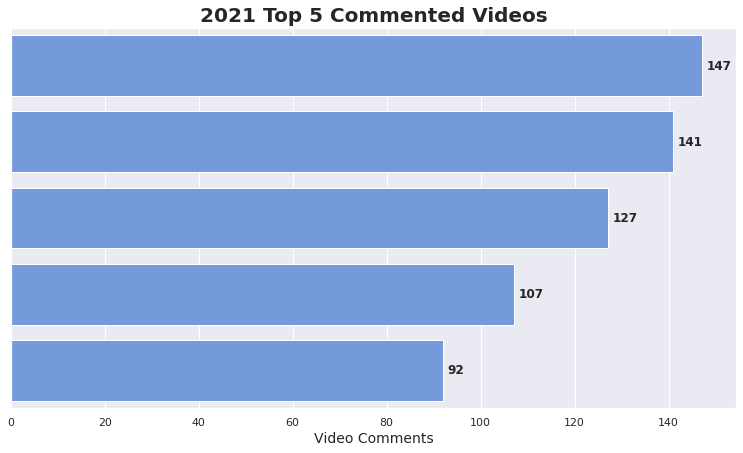

In [30]:
# Years for graphs
years = [2017, 2018, 2019, 2020, 2021]

for x in years:
    
    # Sorting and selcting top 5 values of dataframe
    top_5_comments = top_5[top_5['year']==x].sort_values(by = 'comments_count', ascending = False)[:5]
    
    # Creating the bar chart
    ax = sns.barplot(x = 'comments_count', y = 'video_title',data = top_5_comments, color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Top 5 Commented Videos', fontsize='20', weight='bold')
    ax.set_xlabel('Video Comments', fontsize='14')
    ax.set_ylabel('', fontsize='14')

    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width + 1,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.0f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center',
               weight = 'bold')  # vertical alignment
    
    # Removing y axis tick lables
    ax.set(yticklabels=[])
    
    # Saving figure
    plt.savefig('top_5_commented_videos_'+ str(x) +'.png')
    
    plt.show()

## 8. Top 5 Likes to Dislikes Ratio

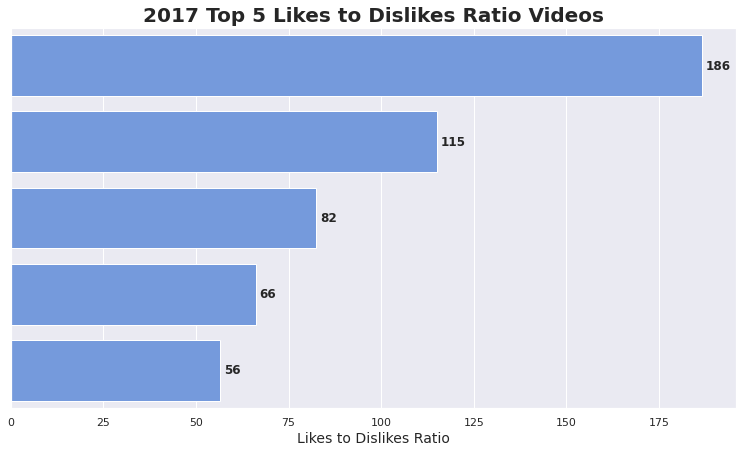

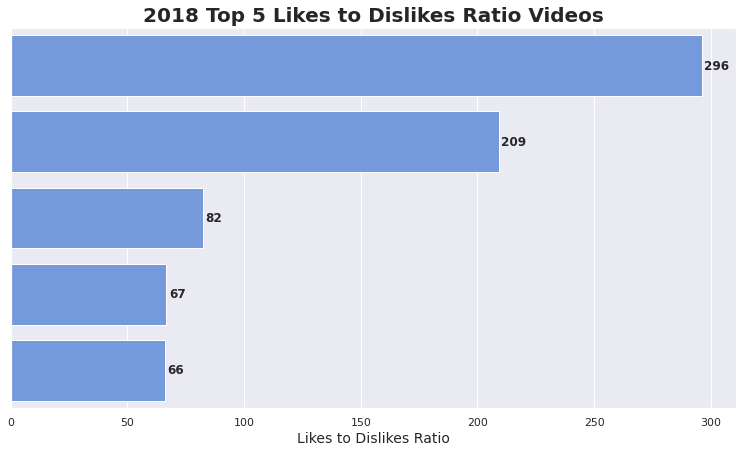

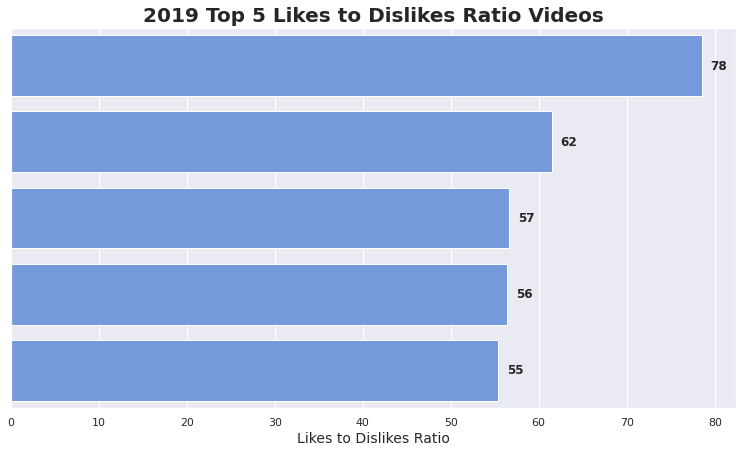

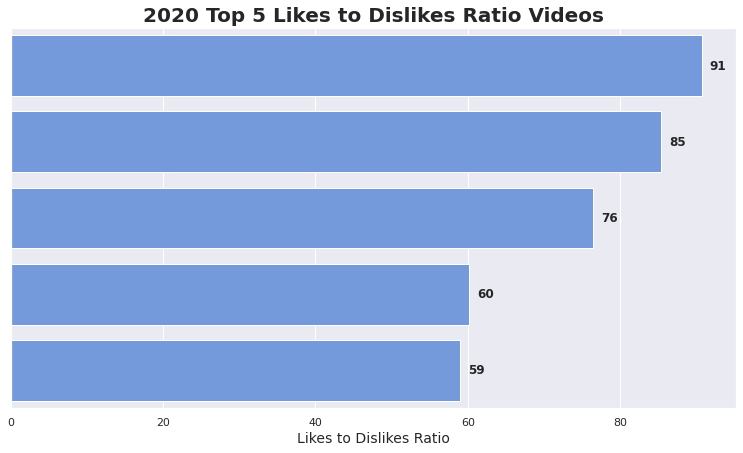

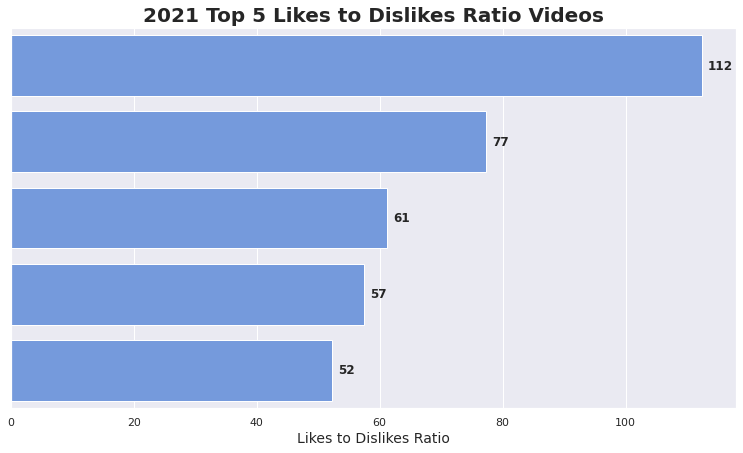

In [31]:
# Years for graphs
years = [2017, 2018, 2019, 2020, 2021]

for x in years:
    
    # Sorting and selcting top 5 values of dataframe
    top_5_likes_dislikes = top_5[top_5['year']==x].sort_values(by = 'likes_dislikes_ratio', ascending = False)[:5]
    
    # Creating the bar chart
    ax = sns.barplot(x = 'likes_dislikes_ratio', y = 'video_title',data = top_5_likes_dislikes, color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Top 5 Likes to Dislikes Ratio Videos', fontsize='20', weight='bold')
    ax.set_xlabel('Likes to Dislikes Ratio', fontsize='14')
    ax.set_ylabel('', fontsize='14')

    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width + 1,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.0f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center',
               weight = 'bold')  # vertical alignment
    
    # Removing y axis tick lables
    ax.set(yticklabels=[])
    
    # Saving figure
    plt.savefig('top_5_likes_to_dislikes_ratio_'+ str(x) +'.png')
    
    plt.show()

## 9. YouTube Channel Wordcloud

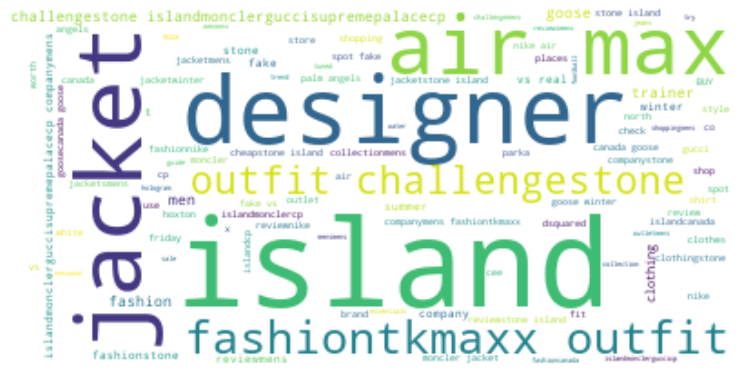

<Figure size 1440x720 with 0 Axes>

In [53]:
# Taking values from text dataframe
tags_text = text_df['video_tags'].values

# Converting values into list
tags_text1 = tags_text.tolist()

# Creating an empty list for all comments
new_list = []

# Creating a list containing all the levels within the tags column of text data
levels = list(range(0, len(tags_text1)))

# For loop which extracts the list from its string form in the tags column
# Appends each videos comment to the empty list
for x in levels:
    y = ast.literal_eval(tags_text1[x])
    new_list.append(y)
    
# Creating one list from list of lists (list for each videos tags section)
flat_list = [item for sublist in new_list for item in sublist]    

# Creating a string from the list of tags
tags_strings = ''.join(flat_list)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", max_words=100).generate(tags_strings)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[20,10])

# Saving File
wordcloud.to_file("wordcloud_tags.png")

plt.show()

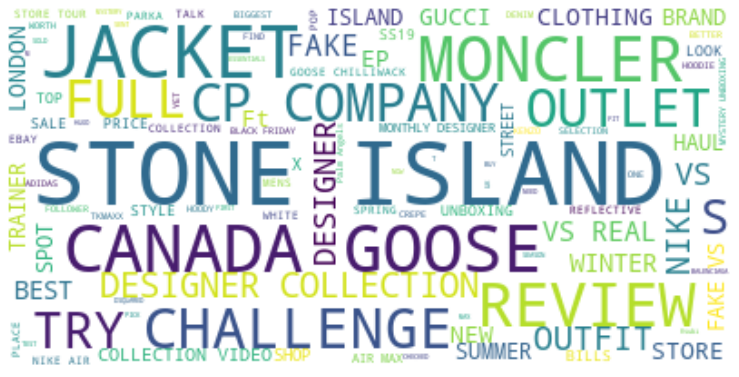

<Figure size 1440x720 with 0 Axes>

In [48]:
# Taking values from text dataframe
video_title_text = text_df['video_title'].values

# Converting values into list
video_title_text1 = video_title_text.tolist()

# Creating a string from the list of titles
video_title_strings = ''.join(video_title_text1)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", max_words=100).generate(video_title_strings)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[20,10])

# Saving File
wordcloud.to_file("wordcloud_titles.png")

plt.show()

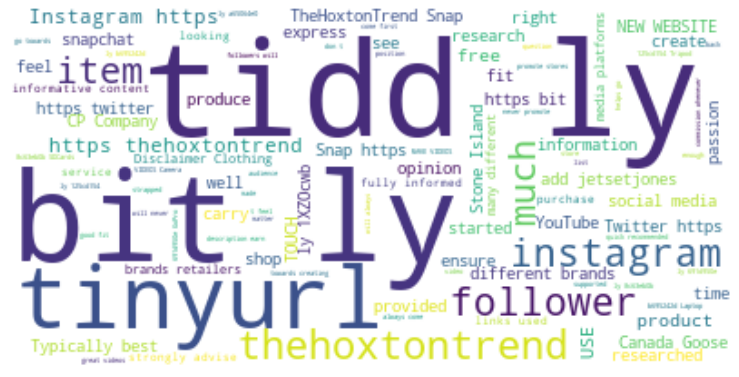

<Figure size 1440x720 with 0 Axes>

In [49]:
# Taking values from text dataframe
video_description_text = text_df['video_description'].values

# Converting values into list
video_description_text1 = video_description_text.tolist()

# Creating a string from the list of descriptions
video_description_strings = ''.join(video_description_text1)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", max_words=100).generate(video_description_strings)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[20,10])

# Saving File
wordcloud.to_file("wordcloud_descriptions.png")

plt.show()

## 10. Commenters Wordcloud

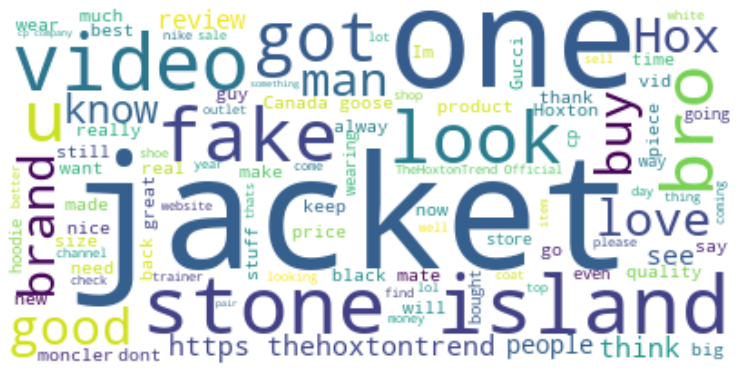

<Figure size 1440x720 with 0 Axes>

In [50]:
# Taking values from text dataframe
comment_text = text_df['video_comments'].values

# Converting values into list
comment_text1 = comment_text.tolist()

# Creating an empty list for all comments
new_list = []

# Creating a list containing all the levels within the comments column of text data
levels = list(range(0, len(comment_text1)))

# For loop which extracts the list from its string form in the comments column
# Appends each videos comment to the empty list
for x in levels:
    y = ast.literal_eval(comment_text1[x])
    new_list.append(y)
    
# Creating one list from list of lists (list for each videos comment section)
flat_list = [item for sublist in new_list for item in sublist]    

# Creating a string from the list of comments
comment_strings = ''.join(flat_list)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", max_words=100).generate(comment_strings)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[20,10])

# Saving File
wordcloud.to_file("wordcloud_comments.png")

plt.show()